## 1) Gathering the Data
Let's start by importing the libraries necessary for conducting the analysis. We'll first need to wrangle the data set, for which we'll use pandas and NumPy. We'll then build some visualisations using Matplotlib. Finally, we'll use scikit-learn to implement linear model.

In [1]:
#importing necessery library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.pandas.set_option("display.max_columns",None)
pd.set_option('display.float_format', '{:.2f}'.format)
import warnings
warnings.filterwarnings('ignore')
import joblib
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.model_selection import GridSearchCV, train_test_split,StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

#The next step is to read in the data set from a CSV file.

In [2]:
#importing the data
data=pd.read_csv('iot_equipment_monitoring_dataset.csv')

## 2) Assessing the Data

Now that we've read in the data set, let's inspect the columns.

In [3]:
data.head(5)

,Timestamp,Sensor_ID,Temperature,Vibration,Pressure,Voltage,Current,FFT_Feature1,FFT_Feature2,Normalized_Temp,Normalized_Vibration,Normalized_Pressure,Normalized_Voltage,Normalized_Current,Anomaly_Score,Fault_Type,Fault_Status
0,2015-01-01 00:00:00,S151,47.70,34.23,176.20,241.59,8.32,0.22,0.09,0.52,0.21,0.40,0.80,0.45,0.24,NaN,0
1,2015-01-01 00:01:00,S192,67.26,134.07,110.94,235.00,11.07,0.97,0.63,0.68,0.67,0.24,0.72,0.55,0.78,NaN,0
2,2015-01-01 00:02:00,S114,45.06,70.60,246.74,232.24,10.35,0.57,0.42,0.50,0.38,0.57,0.69,0.52,0.04,NaN,0
3,2015-01-01 00:03:00,S171,40.26,98.25,202.63,225.92,10.23,0.87,0.93,0.46,0.51,0.46,0.61,0.52,0.58,NaN,0
4,2015-01-01 00:04:00,S160,56.31,138.96,231.15,198.93,18.88,0.88,0.17,0.59,0.69,0.53,0.28,0.85,0.94,NaN,0


##info about dataframe

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Timestamp             50000 non-null  object 
 1   Sensor_ID             50000 non-null  object 
 2   Temperature           50000 non-null  float64
 3   Vibration             50000 non-null  float64
 4   Pressure              50000 non-null  float64
 5   Voltage               50000 non-null  float64
 6   Current               50000 non-null  float64
 7   FFT_Feature1          50000 non-null  float64
 8   FFT_Feature2          50000 non-null  float64
 9   Normalized_Temp       50000 non-null  float64
 10  Normalized_Vibration  50000 non-null  float64
 11  Normalized_Pressure   50000 non-null  float64
 12  Normalized_Voltage    50000 non-null  float64
 13  Normalized_Current    50000 non-null  float64
 14  Anomaly_Score         50000 non-null  float64
 15  Fault_Type         

#There are total-17 columns available on this dataset:

Features:

1.0_Timestamp: Date and time of the sensor reading.

2.0_Sensor_ID: Unique identifier for each IoT sensor.

3.0_Temperature (°C): Measures potential overheating issues.

4.0_Vibration (Hz): Tracks mechanical imbalances and wear.

5.0_Pressure (kPa): Monitors hydraulic or pneumatic system health.

6.0_Voltage (V): Captures electrical stability and performance.

7.0_Current (A): Indicates motor load and operational efficiency.

8.0_FFT_Feature1: Frequency-domain feature extracted via Fast Fourier Transform.

9.0_FFT_Feature2: Another FFT-derived feature for signal analysis.

10.0_Normalized_Temp: Scaled temperature values for consistency.

11.0_Normalized_Vibration: Scaled vibration readings.

12.0_Normalized_Pressure: Scaled pressure measurements.

13.0_Normalized_Voltage: Scaled voltage data.

14.0_Normalized_Current: Scaled current levels.

15.0_Anomaly_Score: A score indicating deviation from normal sensor behavior.

16.0_Fault_Type: Categorical label for the type of equipment fault (None, Overheating, Mechanical Failure, Electrical Fault).

17.0_Fault_Status: Binary indicator (0 = No Fault, 1 = Fault Detected).(Target)


#statstical summary of dataframe

In [5]:
data.describe()

,Temperature,Vibration,Pressure,Voltage,Current,FFT_Feature1,FFT_Feature2,Normalized_Temp,Normalized_Vibration,Normalized_Pressure,Normalized_Voltage,Normalized_Current,Anomaly_Score,Fault_Status
count,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00
mean,50.02,100.05,200.07,219.98,9.99,0.50,0.50,0.54,0.52,0.45,0.54,0.51,0.50,0.30
std,15.02,25.01,49.91,10.00,3.00,0.29,0.29,0.12,0.12,0.12,0.12,0.12,0.29,0.46
min,-16.98,-11.57,10.27,176.26,-3.24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,39.82,83.32,166.21,213.25,7.97,0.25,0.25,0.46,0.44,0.37,0.45,0.43,0.25,0.00
50%,50.06,100.08,199.86,220.03,9.98,0.50,0.50,0.54,0.52,0.45,0.54,0.51,0.50,0.00
75%,60.20,116.79,233.81,226.74,12.01,0.75,0.75,0.63,0.59,0.53,0.62,0.59,0.75,1.00
max,106.40,205.05,428.11,257.82,22.66,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


## 3) Data Cleaning

#Let's check the initial number of rows our data set has, and see how many missing values each column contains.

In [6]:
def count_nulls(data):
    """Displays the number of null values present in each column of the dataframe specified."""
    null_counts=data.count().reset_index()
    null_counts.columns=['col', 'nulls']
    null_counts.nulls=len(data) - null_counts.nulls
    display(null_counts)

print(data.shape)
count_nulls(data)

(50000, 17)


,col,nulls
0,Timestamp,0
1,Sensor_ID,0
2,Temperature,0
3,Vibration,0
4,Pressure,0
5,Voltage,0
6,Current,0
7,FFT_Feature1,0
8,FFT_Feature2,0
9,Normalized_Temp,0


In [7]:
#None value percenatage of entire data set
nan_percentage=(data.isna().sum() / data.shape[0]) * 100
print(nan_percentage)

Timestamp               0.00
Sensor_ID               0.00
Temperature             0.00
Vibration               0.00
Pressure                0.00
Voltage                 0.00
Current                 0.00
FFT_Feature1            0.00
FFT_Feature2            0.00
Normalized_Temp         0.00
Normalized_Vibration    0.00
Normalized_Pressure     0.00
Normalized_Voltage      0.00
Normalized_Current      0.00
Anomaly_Score           0.00
Fault_Type             69.98
Fault_Status            0.00
dtype: float64


#let's remove the nan values which columns have more than 50%

In [8]:
# Removing columns with more than 50% missing values
data = data.dropna(thresh=len(data) * 0.5, axis=1)

#analyze unique values in columns

In [9]:
data.nunique()

Timestamp               50000
Sensor_ID                 100
Temperature             50000
Vibration               50000
Pressure                50000
Voltage                 50000
Current                 50000
FFT_Feature1            50000
FFT_Feature2            50000
Normalized_Temp         50000
Normalized_Vibration    50000
Normalized_Pressure     50000
Normalized_Voltage      50000
Normalized_Current      50000
Anomaly_Score           50000
Fault_Status                2
dtype: int64

the above analyze Timestamp not need. it will not affect the model,so we can drop the Timestamp  column.

In [10]:
data.drop(columns='Timestamp',inplace=True)

Check outlayer for numerical data's

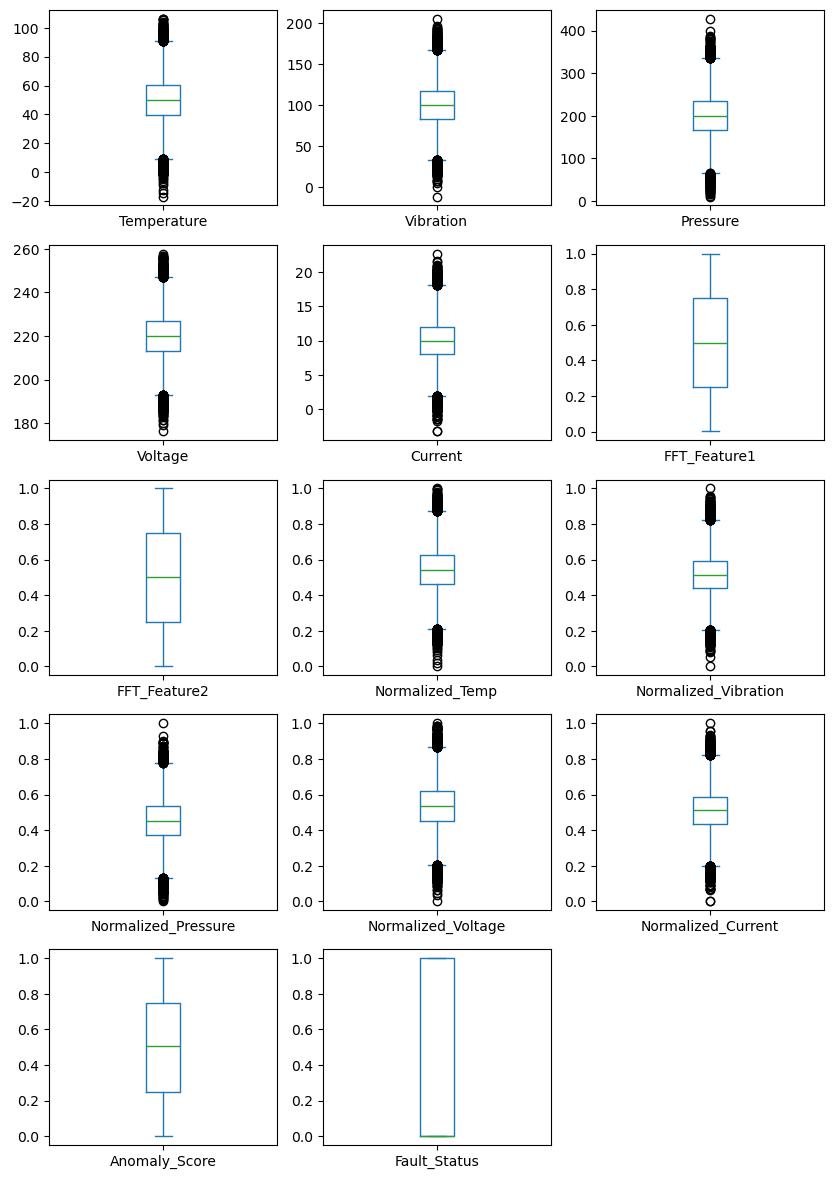

In [11]:
#numerical columns
int_columns=(data.select_dtypes(include=['int64','float64'])).columns

#analysis of outlayer 
data[int_columns] .plot(kind="box",subplots=True,layout=(10,3),figsize=(10,30))
plt.show()

Removing outlayers

In [12]:
#remove outlyaer
Q1 = data[int_columns].quantile(0.25)
Q3 = data[int_columns].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
for column in int_columns:
    mean_value = data[column].mean()
    
    data[column] = np.where(
        (data[column] < lower_bound[column]) | (data[column] > upper_bound[column]), 
        mean_value,  
        data[column]  
    )

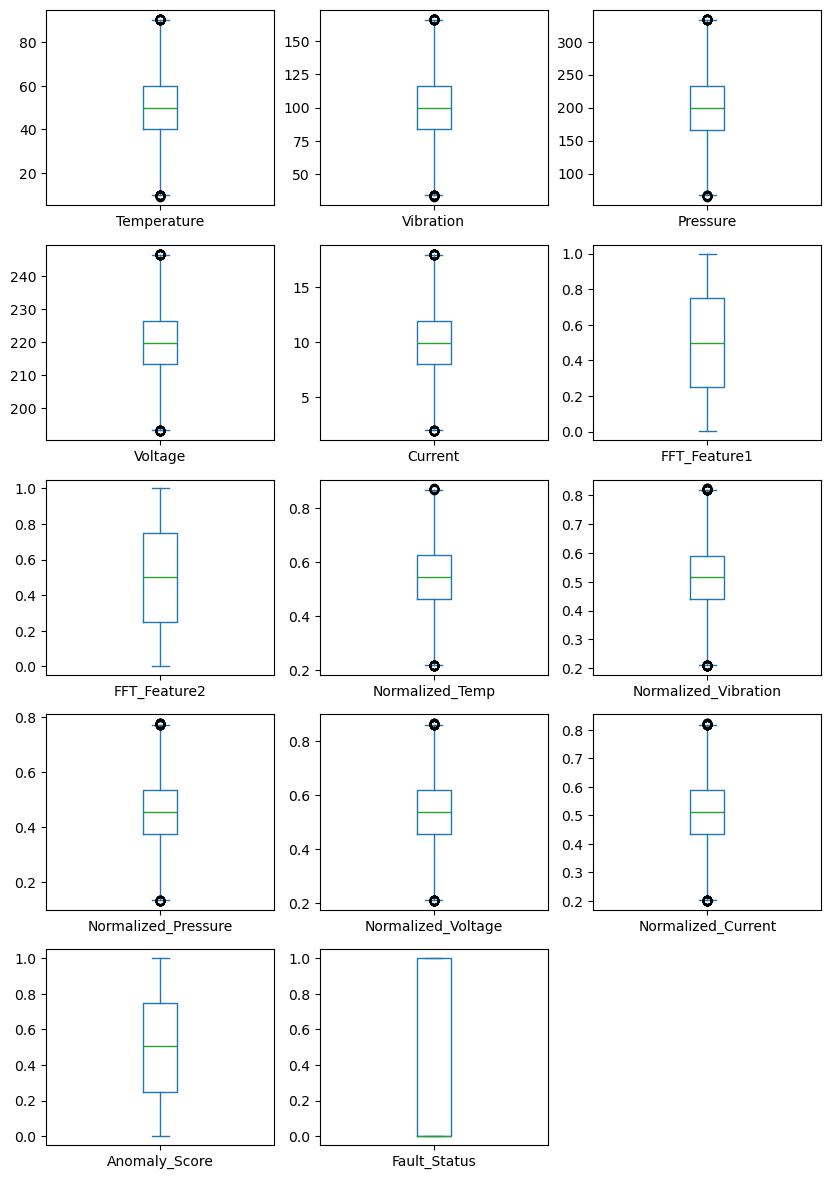

In [13]:
#analysis of after outlayer removeing 
data[int_columns] .plot(kind="box",subplots=True,layout=(10,3),figsize=(10,30))
plt.show()

## 4) Analysis and Visualisation

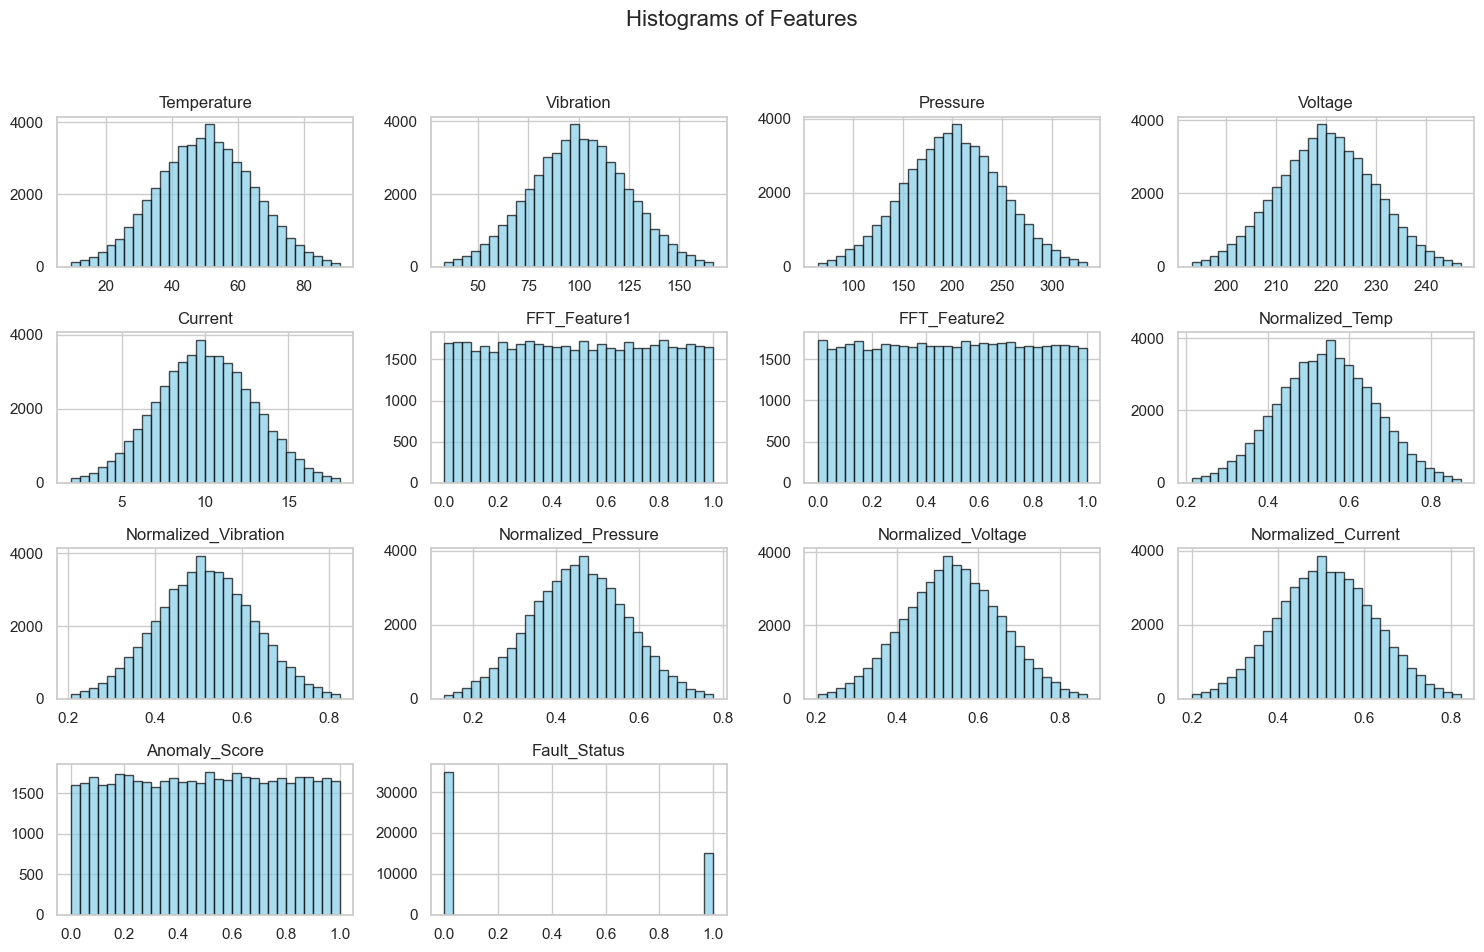

In [14]:
# Histograms analysis distribution of data

sns.set(style="whitegrid")
ax = data.hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black', alpha=0.7)

plt.suptitle('Histograms of Features', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

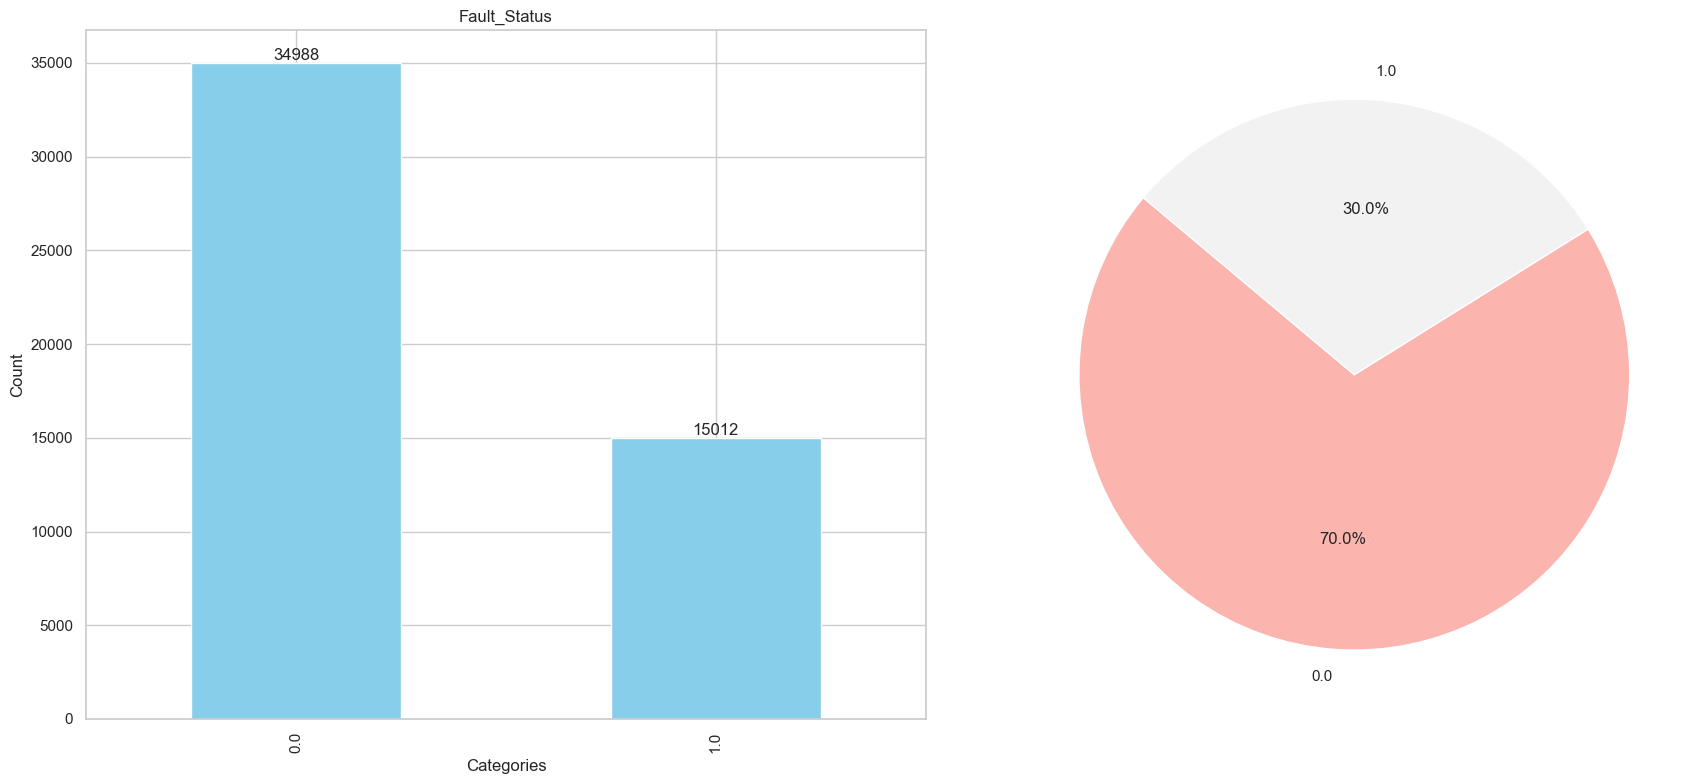

In [15]:
# Visualize the distribution of target
# Bar chart
fig, axes=plt.subplots(1, 2, figsize=(18, 8))
rating_visual =data['Fault_Status'].value_counts().plot(kind='bar', ax=axes[0], color='skyblue')
rating_visual.bar_label(rating_visual.containers[0])
axes[0].set_title("Fault_Status")
axes[0].set_xlabel("Categories")
axes[0].set_ylabel("Count")

# Pie chart
status_counts=data['Fault_Status'].value_counts()
status_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, ax=axes[1], cmap="Pastel1")
axes[1].set_ylabel("")  
plt.tight_layout()
plt.show()

In [16]:
#save copyed cleaned  data set for safety purpose
data_final=data.copy()

##  Split the data for training and testing

In [17]:
X=data.drop(columns='Fault_Status')
y=data[['Fault_Status']]

In [18]:
# Stratified train-test split to preserve class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

##  Model training and testing

In [19]:
# Define preprocessing: scaling for numerical features
numerical_features = X.select_dtypes(include=['int64', 'float64', 'bool']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
    ])

# Define the pipeline with preprocessing, SMOTE, and classifier
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),  # Oversample the minority class in training
    ('classifier', RandomForestClassifier(class_weight='balanced', random_state=42))
])

# Define parameter grid using correct step name 'classifier'
param_grid = {
    'classifier__n_estimators': [100],
    'classifier__max_depth': [None]
}

# Use GridSearchCV with a stratified 5-fold cross-validation and F1 scoring
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='f1',
    n_jobs=-1
)

# Train the pipeline on the training data
grid_search.fit(X_train, y_train)

# Evaluate the model on the test data
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1])

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Save the trained pipeline
model_path = 'trained_pipeline.pkl'
joblib.dump(grid_search.best_estimator_, model_path)
print(f"\nTrained pipeline model saved to {model_path}")
print("Project completed successfully")


Accuracy: 0.6051
Precision: 0.5793
Recall: 0.6051
F1 Score: 0.5900
ROC-AUC Score: 0.4993

Classification Report:
               precision    recall  f1-score   support

         0.0       0.70      0.76      0.73      6998
         1.0       0.30      0.23      0.26      3002

    accuracy                           0.61     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.58      0.61      0.59     10000

Confusion Matrix:
 [[5346 1652]
 [2297  705]]

Trained pipeline model saved to trained_pipeline.pkl
Project completed successfully
